**Nombre: Arturo Garza Campuzano**

**Matrícula: A00828096**

# Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución

El dataset utilizado en esta implementación es *Diabetes Dataset* y se puede encontrar en https://www.kaggle.com/datasets/mathchi/diabetes-data-set. En este mismo sitio se puede consultar una breve descripción del mismo.

En este caso se implementó un **clasificador de árbol de decisión**, cuyo propósito es predecir, en base a medidas diagnósticas, si un paciente tiene diabetes o no. Por lo tanto, este problema puede ser considerado como de clasificación.

## Importar módulos

In [27]:
# Uso general
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Division en subconjuntos de train, test & validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Analisis de desempeno
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

## Cargar datos

In [28]:
# Este bloque de codigo no es necesario si el archivo esta guardado localmente
from google.colab import drive
drive.mount('/content/drive')

# Cambiar ruteo con de acuerdo a la ubicacion los archivos en su dispositivo
diabetes_df = pd.read_csv('/content/drive/MyDrive/TC3006C101_A00828096/Aprendizaje_Maquina/diabetes.csv')

#Descripcion de datos
cantidad_registros = len(diabetes_df)
numero_caracteristicas = len(diabetes_df.columns) - 1
valores_salida = diabetes_df["Outcome"].unique()
print("Descripcion de Diabetes Dataset")
print(f"Cantidad de registros: {cantidad_registros}")
print(f"Número de características: {numero_caracteristicas}")
print(f"Valores de salida: {valores_salida}")
diabetes_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Descripcion de Diabetes Dataset
Cantidad de registros: 768
Número de características: 8
Valores de salida: [1 0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Limpieza del conjunto

El valor cero no es aceptable para algunas variables. Se reemplazan estos valores con la media respectiva a cada variable.

In [29]:
# Se reemplazan los ceros por la media de las variables
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', "Insulin"]

for column in zero_not_accepted:
  diabetes_df[column] = diabetes_df[column].replace(0, np.NaN)
  mean = int(diabetes_df[column].mean(skipna = True))
  diabetes_df[column] = diabetes_df[column].replace(np.NaN, mean)

## Separación de datos en subconjuntos

Se divide el conjunto de datos en entrenamiento y prueba.

In [30]:
# Seleccion de columnas de train_df
n = len(diabetes_df.columns) - 1
X = diabetes_df.iloc[:, 0:n]
y = diabetes_df.iloc[:, n]

# Dividir el dataset en conjuntos de entrenamiento (60%) y prueba (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Cualquier algoritmo en el que se calcula la distancia o se asume normalidad, los atributos se escalan. En este caso, se asume la normalidad de los datos y, por lo tanto, se escalan.

In [31]:
# Escalamiento de variables
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Entrenamiento del modelo

Para entrenar el **árbol de decisión** se ajustaron los siguientes hiper-parámetros:

- criterion = "entropy"
- max_depth = 10
- min_samples_split = 70

In [32]:
# Crea un arbol de decision con hiperparametros y se ajusta a los datos de entrenamiento
best_tree = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_split=70)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=70)

## Análisis de desempeño

### Métricas de desempeño para subconjuntos de entrenamiento y prueba

Para evaluar el desempeño del árbol de desición lo probamos con los subconjuntos de entrenamiento y prueba para obtener las predicciones. Después se calculan las métricas de desempeño considerando las predicciones de cada subconjunto y los valores esperados.

In [33]:
def metricas_desempeno(y, y_pred):
  confusion_matrix_results = confusion_matrix(y, y_pred)
  accuracy_score_results = accuracy_score(y, y_pred)
  precision_score_results = precision_score(y, y_pred)
  recall_score_results = recall_score(y, y_pred)
  f1_score_results = f1_score(y, y_pred)
  return confusion_matrix_results, accuracy_score_results, precision_score_results, recall_score_results, f1_score_results

# Metricas de desempeno para subconjunto de entrenamiento
y_pred_train = best_tree.predict(X_train)
confusion_matrix_train, accuracy_score_train, precision_score_train, recall_score_train, f1_score_train = metricas_desempeno(y_train, y_pred_train)

# Metricas de desempeno para subconjunto de prueba
y_pred_test = best_tree.predict(X_test)
confusion_matrix_test, accuracy_score_test, precision_score_test, recall_score_test, f1_score_test = metricas_desempeno(y_test, y_pred_test)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [accuracy_score_train, precision_score_train, recall_score_train, f1_score_train],
    'Test': [accuracy_score_test, precision_score_test, recall_score_test, f1_score_test]
})

metrics_df


,Metric,Train,Test
0,Accuracy,0.815217,0.762987
1,Precision,0.721311,0.616000
2,Recall,0.795181,0.754902
3,F1 Score,0.756447,0.678414


En general, el modelo parece estar funcionando de manera razonable. Sin embargo, si se considerara utilizar el modelo sobre pacientes reales y utilizarlo como herramienta eficaz para diagnosticar diabetes creo que se tendría que mejorar. Este modelo sólo podría de servir como una herramienta experimental, un prototipo.

### Matriz de confusión

Con motivo de comparar entre las predicciones generadas por el modelo y los valores que debieron de obtenerse se grafica la matriz de confusión para los subconjuntos de entrenamiento y prueba.

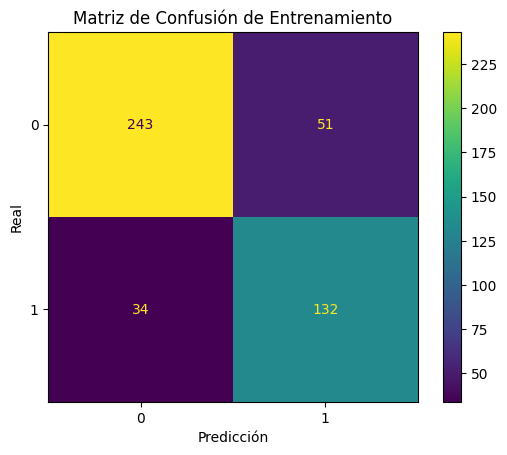

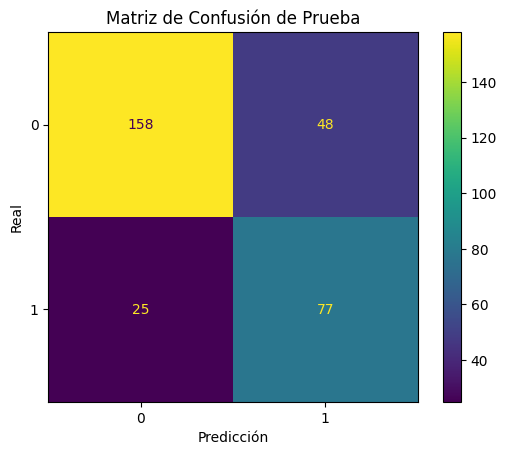

In [34]:
# Grafica la matriz de confusión de entrenamiento
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_train)
disp.plot()
plt.title('Matriz de Confusión de Entrenamiento')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Grafica la matriz de confusión de prueba
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
disp.plot()
plt.title('Matriz de Confusión de Prueba')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

### Predicciones con modelo entrenado

Después de haber entrenado el modelo se realizan tres predicciones puntuales con datos aleatorios. Estos se comparan con los datos reales extraidos del subconjunto de prueba.

In [36]:
# Obtener la longitud de X_test (y_test tendrá la misma longitud)
n_samples = len(X_test)

# Elegir tres índices aleatorios únicos de X_test
random_indices = random.sample(range(n_samples), min(3, n_samples))

# Obtener las tres muestras de X_test y y_test utilizando los índices seleccionados
three_X_samples = [X_test[i] for i in random_indices]
three_y_samples = [y_test.iloc[i] for i in random_indices]

pred_puntuales = best_tree.predict(three_X_samples)

# Crear un diccionario con los datos
data = {
    'Real': three_y_samples,
    'Prediccion': pred_puntuales
}

# Crear el DataFrame
resultado_df = pd.DataFrame(data)

# Imprimir el DataFrame
resultado_df

,Real,Prediccion
0,0,0
1,0,0
2,1,0
